In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Load the CSV data into a pandas DataFrame
df = pd.read_csv('FinalData2.csv')
df['domain'] = df['domain'].astype(str)
df['name'] = df['name'].astype(str)
df['provider'] = df['provider'].astype(str)
df['ipv4'] = df['ipv4'].astype(str)
df['country1'] = df['country1'].astype(str)
df['city1'] = df['city1'].astype(str)
df['ipv6'] = df['ipv6'].astype(str)
df['country2'] = df['country2'].astype(str)
df['city2'] = df['city2'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df = df.rename(columns={'measurement1': 'ipv4_result', 'measurement2': 'ipv6_result'})
# Print the loaded data to verify
df

,domain,date,name,provider,ipv4,country1,city1,ipv4_result,ipv6,country2,city2,ipv6_result
0,google.com,2023-09-18,Akshat,Jio,142.250.206.142,India,New Delhi,1001,2404:6800:4002:815::200e,India,Mumbai,1197
1,amazonaws.com,2023-09-18,Akshat,Jio,207.171.166.22,United States,Ashburn,539,64:ff9b::cfab:a616,,,291
2,facebook.com,2023-09-18,Akshat,Jio,157.240.16.35,India,Mumbai,92,2a03:2880:f144:181:face:b00c:0:25de,India,Noida,38
3,microsoft.com,2023-09-18,Akshat,Jio,20.70.246.20,Australia,The Rocks,200,2603:1030:20e:3::23c,United States,Washington,276
4,googleapis.com,2023-09-18,Akshat,Jio,142.250.194.68,India,New Delhi,78,2404:6800:4002:820::2004,India,Mumbai,42
...,...,...,...,...,...,...,...,...,...,...,...,...
5921,zemanta.com,2023-10-11,Jahanvi,Airtel,23.57.238.160,India,New Delhi,457,2600:1413:b000:79f::3892,Singapore,Singapore,667
5922,w3.org,2023-10-11,Jahanvi,Airtel,104.18.23.19,Canada,Toronto,326,2606:4700::6812:1713,Canada,Montreal,49
5923,bbc.co.uk,2023-10-11,Jahanvi,Airtel,151.101.0.81,United States,San Francisco,49,2a04:4e42::81,United Kingdom,London,75
5924,example.com,2023-10-11,Jahanvi,Airtel,93.184.216.34,United States,Norwell,777,2606:2800:220:1:248:1893:25c8:1946,United States,New York,978


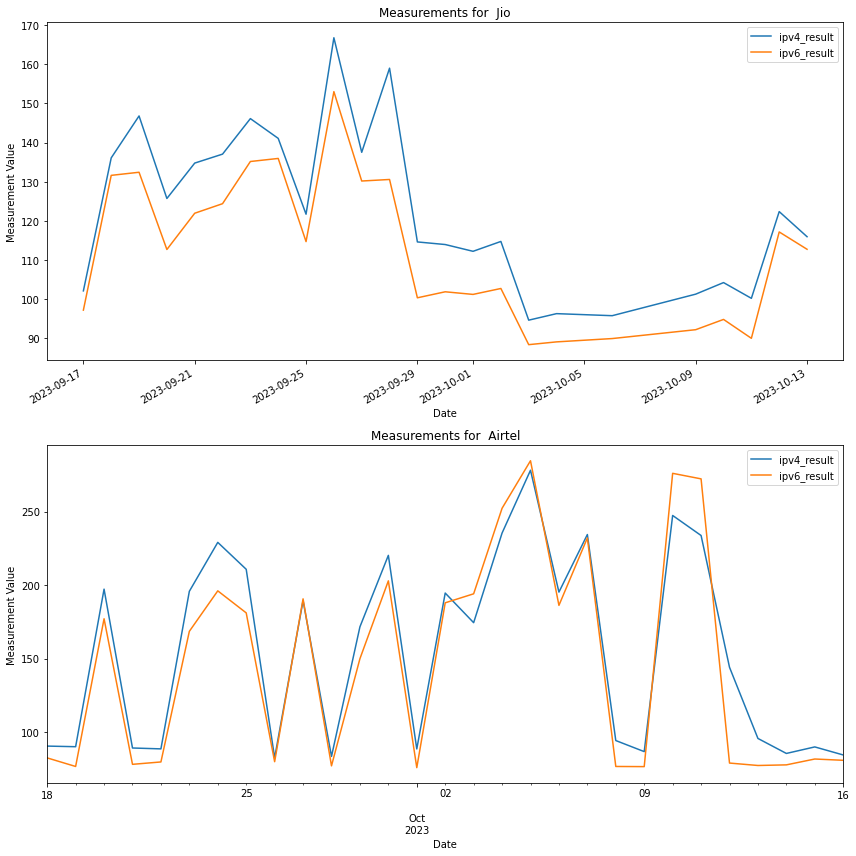

In [12]:
# Get unique providers
unique_providers = df['provider'].unique()

# Create subplots for each provider
fig, axes = plt.subplots(nrows=len(unique_providers), figsize=(12, 6 * len(unique_providers)))

# Group by 'date' for each provider and plot the data
for i, provider in enumerate(unique_providers):
    provider_data = df[df['provider'] == provider].groupby('date')[['ipv4_result', 'ipv6_result']].mean()
    provider_data.plot(ax=axes[i])
    axes[i].set_title(f'Measurements for {provider}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Measurement Value')
    axes[i].legend()

plt.tight_layout()
fig.savefig("plots\Mean Measurement for provider.png" ,dpi=300)
plt.show()


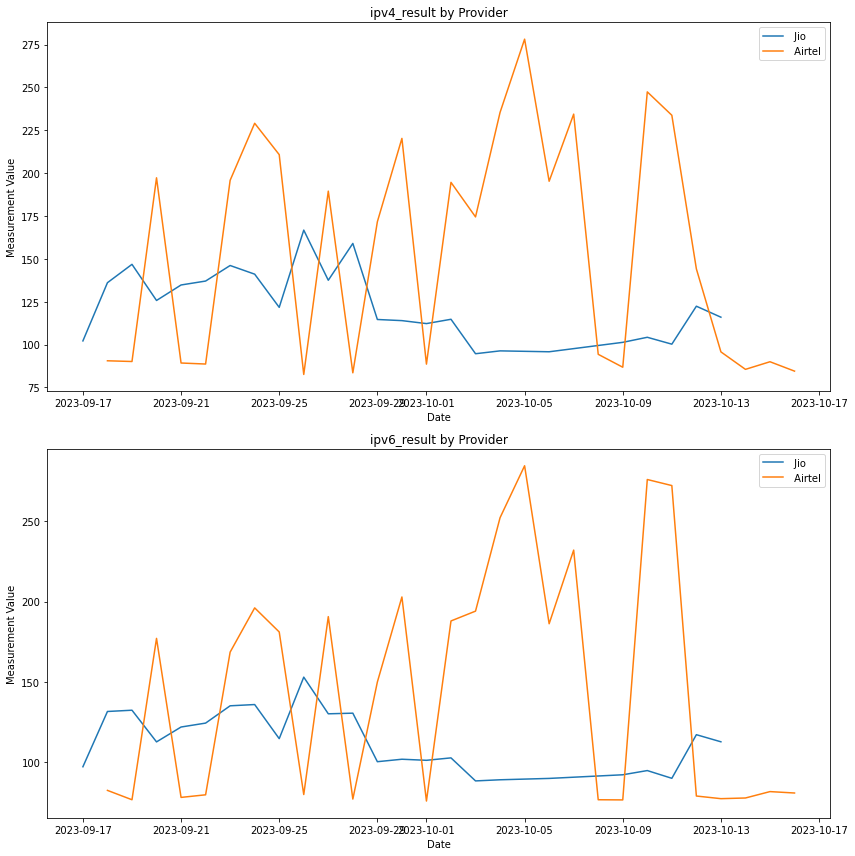

In [13]:
# Get unique measurements
unique_measurements = ['ipv4_result', 'ipv6_result']

# Create subplots for each measurement
fig, axes = plt.subplots(nrows=len(unique_measurements), figsize=(12, 6 * len(unique_measurements)))

# Group by 'date' for each measurement and plot the data
for i, measurement in enumerate(unique_measurements):
    for provider in df['provider'].unique():
        provider_data = df[df['provider'] == provider].groupby('date')[measurement].mean()
        axes[i].plot(provider_data.index, provider_data, label=f'{provider}')

    axes[i].set_title(f'{measurement} by Provider')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Measurement Value')
    axes[i].legend()

plt.tight_layout()
fig.savefig("plots\Mean Measurement provider wise.png",dpi=300)
plt.show()


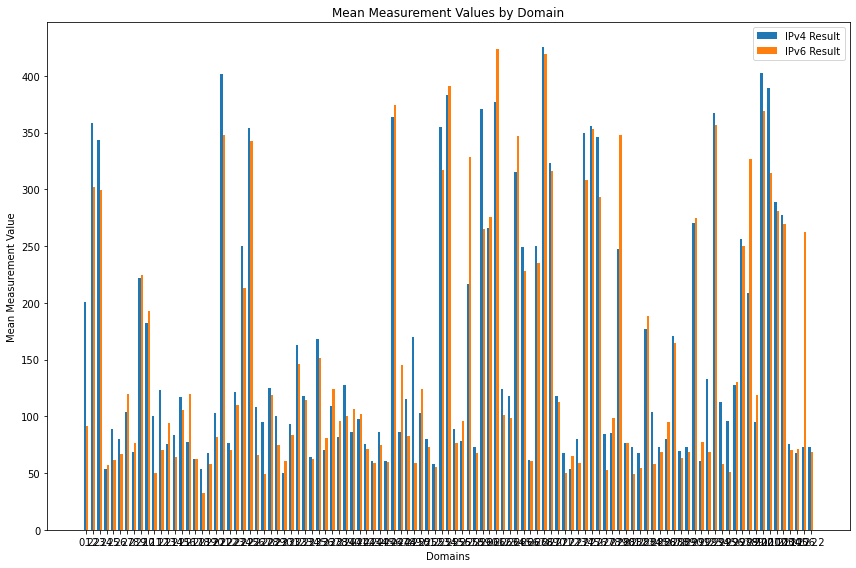

In [14]:
# Group by 'domain' and calculate the mean for 'ipv4_result' and 'ipv6_result'
grouped_means = df.groupby('domain')[['ipv4_result', 'ipv6_result']].mean()

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = range(len(grouped_means))

bar1 = ax.bar(index, grouped_means['ipv4_result'], bar_width, label='IPv4 Result')
bar2 = ax.bar([p + bar_width for p in index], grouped_means['ipv6_result'], bar_width, label='IPv6 Result')

ax.set_xlabel('Domains')
ax.set_ylabel('Mean Measurement Value')
ax.set_title('Mean Measurement Values by Domain')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.legend()

plt.tight_layout()
fig.savefig("plots\Mean Measurement Values by Domain(Single Bar).png",dpi=300)
plt.show()


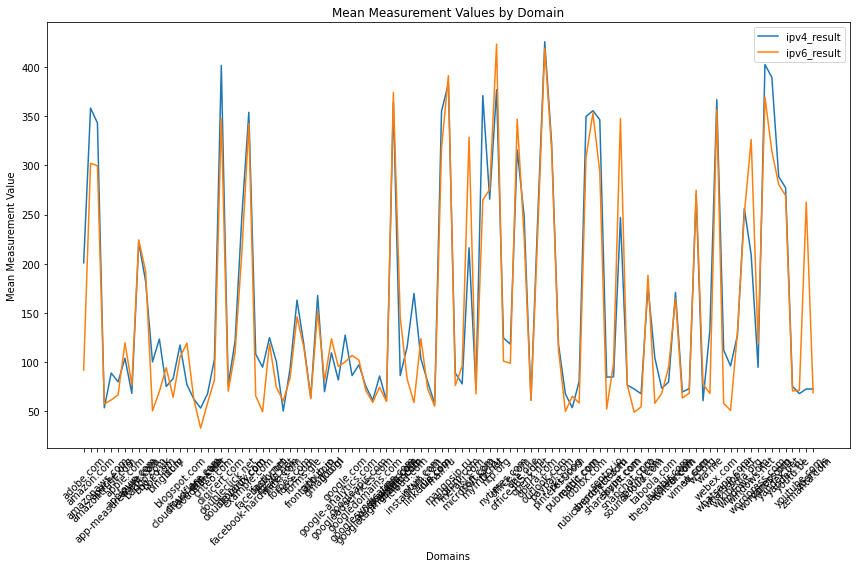

In [15]:
# Group by 'domain' and calculate the mean for 'ipv4_result' and 'ipv6_result'
grouped_means = df.groupby('domain')[['ipv4_result', 'ipv6_result']].mean()

# Plot line chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot lines for each measurement
for measurement in ['ipv4_result', 'ipv6_result']:
    ax.plot(grouped_means.index, grouped_means[measurement], label=f'{measurement}')

ax.set_xlabel('Domains')
ax.set_ylabel('Mean Measurement Value')
ax.set_title('Mean Measurement Values by Domain')
ax.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
fig.savefig("plots\Mean Measurement Values by Domain(Single Line).png",dpi=300)
plt.show()


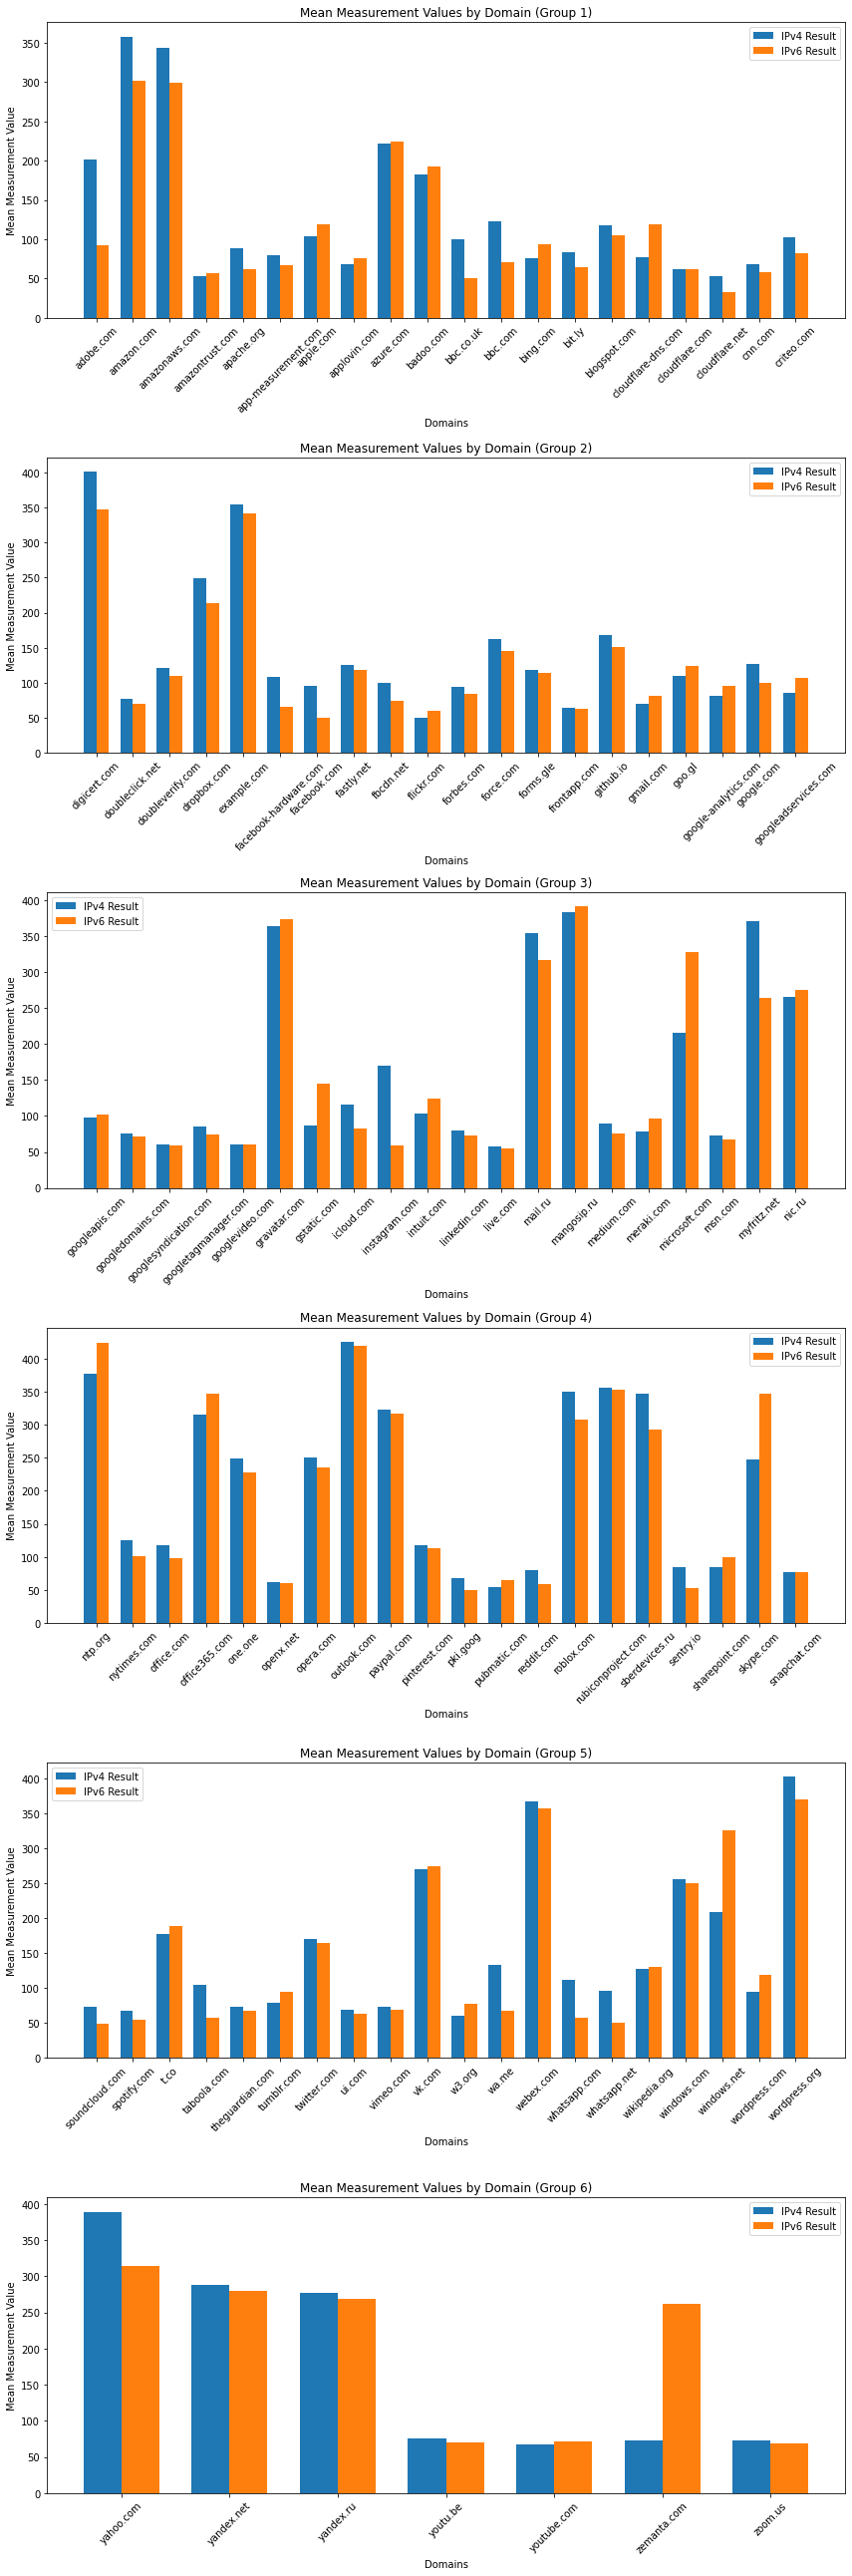

In [21]:
# Group by 'domain' and calculate the mean for 'ipv4_result' and 'ipv6_result'
grouped_means = df.groupby('domain')[['ipv4_result', 'ipv6_result']].mean()

# Define the number of domains to show per graph
domains_per_graph = 20

# Calculate the number of subplots needed
num_subplots = int(np.ceil(len(grouped_means) / domains_per_graph))

# Create subplots
fig, axes = plt.subplots(nrows=num_subplots, figsize=(12, 6 * num_subplots))

for i, ax in enumerate(axes):
    start_idx = i * domains_per_graph
    end_idx = (i + 1) * domains_per_graph
    subset_grouped_means = grouped_means[start_idx:end_idx]

    # Plot grouped bar chart for the subset of domains
    bar_width = 0.35
    index = np.arange(len(subset_grouped_means))

    bar1 = ax.bar(index, subset_grouped_means['ipv4_result'], bar_width, label='IPv4 Result')
    bar2 = ax.bar(index + bar_width, subset_grouped_means['ipv6_result'], bar_width, label='IPv6 Result')

    ax.set_xlabel('Domains')
    ax.set_ylabel('Mean Measurement Value')
    ax.set_title(f'Mean Measurement Values by Domain (Group {i + 1})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(subset_grouped_means.index, rotation=45)
    ax.legend()

plt.tight_layout()
fig.savefig("plots\Mean Measurement Values by Domain.png",dpi=600)
plt.show()


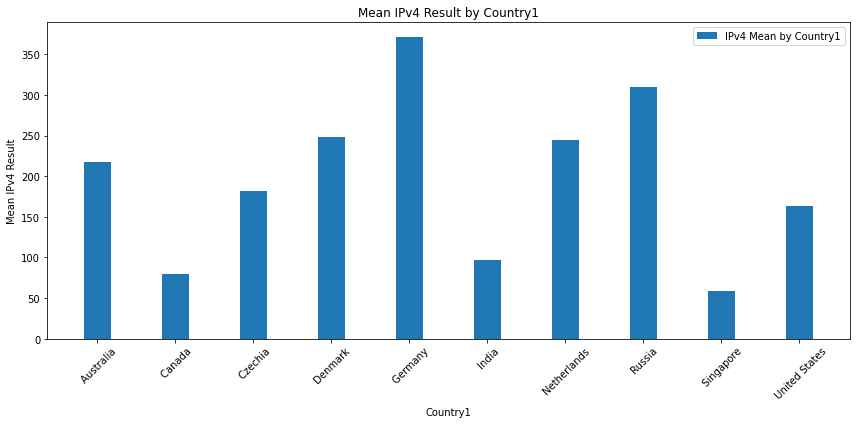

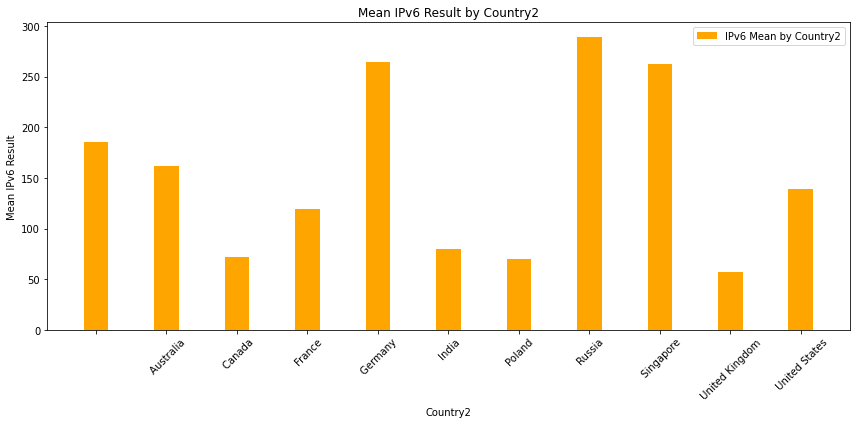

In [17]:
# Group by 'country1' and calculate the mean for 'ipv4_result'
ipv4_means_by_country1 = df.groupby('country1')['ipv4_result'].mean()

# Group by 'country2' and calculate the mean for 'ipv6_result'
ipv6_means_by_country2 = df.groupby('country2')['ipv6_result'].mean()

# Create bar chart for IPv4 results mean grouped by 'country1'
fig, axes = plt.subplots(figsize=(12, 6))

index_ipv4 = np.arange(len(ipv4_means_by_country1))
bar_width = 0.35

bars_ipv4 = plt.bar(index_ipv4, ipv4_means_by_country1, bar_width, label='IPv4 Mean by Country1')

plt.xlabel('Country1')
plt.ylabel('Mean IPv4 Result')
plt.title('Mean IPv4 Result by Country1')
plt.xticks(index_ipv4, ipv4_means_by_country1.index, rotation=45)
plt.legend()
plt.tight_layout()
fig.savefig("plots\Country wise seperate 1.png",dpi=300)
plt.show()

# Create bar chart for IPv6 results mean grouped by 'country2'
fig, axes = plt.subplots(figsize=(12, 6))

index_ipv6 = np.arange(len(ipv6_means_by_country2))

bars_ipv6 = plt.bar(index_ipv6, ipv6_means_by_country2, bar_width, label='IPv6 Mean by Country2', color='orange')

plt.xlabel('Country2')
plt.ylabel('Mean IPv6 Result')
plt.title('Mean IPv6 Result by Country2')
plt.xticks(index_ipv6, ipv6_means_by_country2.index, rotation=45)
plt.legend()
plt.tight_layout()
fig.savefig("plots\Country wise seperate 2.png",dpi=300)
plt.show()

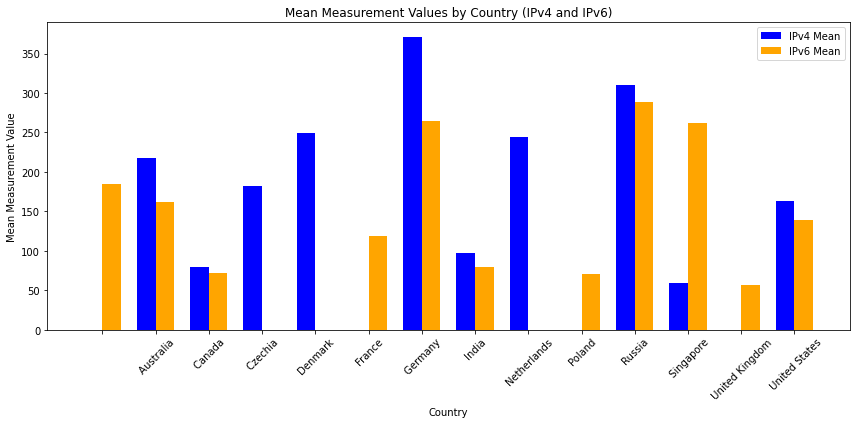

In [18]:
# Group by 'country1' and calculate the mean for 'ipv4_result'
ipv4_means_by_country1 = df.groupby('country1')['ipv4_result'].mean()

# Group by 'country2' and calculate the mean for 'ipv6_result'
ipv6_means_by_country2 = df.groupby('country2')['ipv6_result'].mean()

# Get unique countries
unique_countries = sorted(set(ipv4_means_by_country1.index) | set(ipv6_means_by_country2.index))

# Create bar chart for IPv4 and IPv6 results mean grouped by country
fig, axes = plt.subplots(figsize=(12, 6))

index = np.arange(len(unique_countries))
bar_width = 0.35

bars_ipv4 = plt.bar(index, [ipv4_means_by_country1.get(country, 0) for country in unique_countries],
                     bar_width, label='IPv4 Mean', color='blue')

bars_ipv6 = plt.bar(index + bar_width, [ipv6_means_by_country2.get(country, 0) for country in unique_countries],
                     bar_width, label='IPv6 Mean', color='orange')

plt.xlabel('Country')
plt.ylabel('Mean Measurement Value')
plt.title('Mean Measurement Values by Country (IPv4 and IPv6)')
plt.xticks(index + bar_width / 2, unique_countries, rotation=45)
plt.legend()
plt.tight_layout()
fig.savefig("plots\Country wise single.png" , dpi=300)
plt.show()